In [7]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import cv2

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_dir = os.path.join(root_dir, 'image_archive')
        self.mask_dir = os.path.join(root_dir, 'mask_archive')
        self.image_filenames = os.listdir(self.image_dir)
        self.mask_filenames = ['mask_' + filename.split('_')[1] for filename in self.image_filenames]  # Generate mask filenames
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_name = os.path.join(self.mask_dir, self.mask_filenames[idx])

        # image = cv2.resize(cv2.imread(img_name), (512, 512))
        mask = cv2.resize(cv2.imread(mask_name, 0), (512, 512))

        # image = np.transpose(image, (2,0,1))
        # mask = np.transpose(mask, (2,0,1))

        # Convert image to RGB format (if necessary)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # image = np.transpose(image, (2, 0, 1))  # Transpose image dimensions
        mask = np.expand_dims(mask, axis=0)  # Add channel dimension to mask

        # image = torch.from_numpy(image).float()
        mask = torch.from_numpy(mask).type(torch.uint8)
        image = Image.open(img_name)
        # mask = Image.open(mask_name)

        if self.transform:
            image = self.transform(image)
        #     mask = self.transform(mask)
        #     mask = mask*255

        return image, mask

# Example usage:
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the images to a fixed size
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

dataset = CustomDataset(root_dir='/content/drive/MyDrive/CV /IDD20K_II', transform=transform)
dataloader = DataLoader(dataset, batch_size=8)

In [10]:
tempo = cv2.resize(cv2.imread('/content/drive/MyDrive/CV /IDD20K_II/mask_archive/mask_5026.jpg'), (512, 512))

In [11]:
tempo = np.transpose(tempo, (2,0,1))
tempo = torch.from_numpy(tempo).type(torch.uint8)
print(tempo.shape)

torch.Size([3, 512, 512])


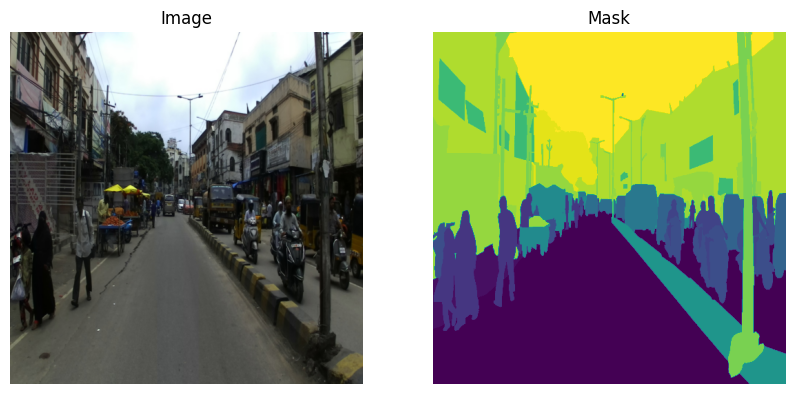

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Define a function to display images
def show_images(image, mask):
    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the image
    axes[0].imshow(image.permute(1, 2, 0))
    axes[0].set_title('Image')
    axes[0].axis('off')

    # Display the mask
    axes[1].imshow(mask.permute(1, 2, 0))
    axes[1].set_title('Mask')
    axes[1].axis('off')

    # Show the plots
    plt.show()

# Accessing the dataset
image, mask = dataset[0]  # Accessing the first image and its mask
show_images(image, mask)

In [ ]:
colors = {
    'road': [(128, 64, 128), 0],
    'sidewalk': [(244, 35, 232), 3],
    'person': [(220, 20, 60), 5],
    'rider': [(255, 0, 0), 7],
    'motorbike': [(0, 0, 230), 8],
    'bicycle': [(119, 11, 32), 9],
    'car': [(0, 0, 142), 11],
    'truck': [(0, 0, 70), 12],
    'bus': [(0, 60, 100), 13],
    'train': [(0, 80, 100), 15],
    'wall': [(102, 102, 156), 17],
    'fence': [(190, 153, 153), 18],
    'traffic sign': [(220, 220, 0), 21],
    'traffic light': [(250, 170, 30), 22],
    'pole': [(153, 153, 153), 23],
    'building': [(70, 70, 70), 22],
    'vegetation': [(107, 142, 35), 24],
    'sky': [(70, 130, 180), 25]
}

In [ ]:
distributions = {key: 0 for key in colors.keys()}

for i in range(len(dataset)):
  print(i)
  image, mask = dataset[i]

  for key, value in colors.items():
      # Extract the label value from the color dictionary
      label_value = value[1]
      # print(label_value)

      # Count pixels in the mask with the label value
      mask_pixels = np.sum(mask == label_value)
      # print(mask_pixels)

      # Update the distributions dictionary
      distributions[key] += mask_pixels

print(distributions)

Streaming output truncated to the last 5000 lines.
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172

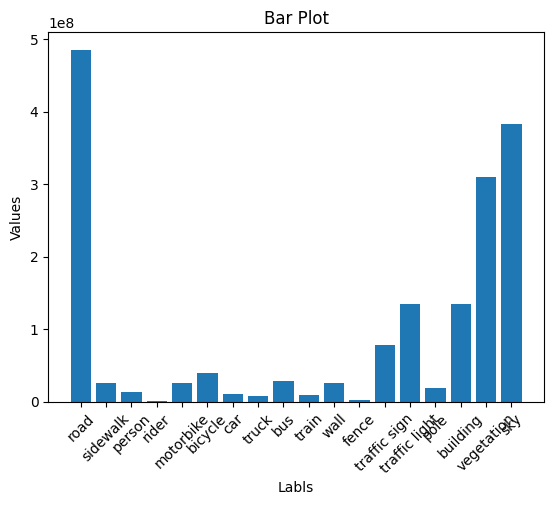

In [ ]:
# Extract keys and values
keys = list(distributions.keys())
values = list(distributions.values())

# Plotting
plt.bar(keys, values)
plt.xlabel('Labls')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.xticks(rotation=45)
plt.show()

In [ ]:
img1, mask1 = dataset[0]
img2, mask2 = dataset[1]

In [ ]:
mask1 = mask1.view(512, 512)
mask2 = mask2.view(512, 512)

In [ ]:
def color_mask(mask):
    height, width = mask.shape
    image = np.zeros((height, width, 3), dtype=np.uint8)

    for label, (color, id_) in colors.items():
        image[mask == colors[label][1]] = color

    return image

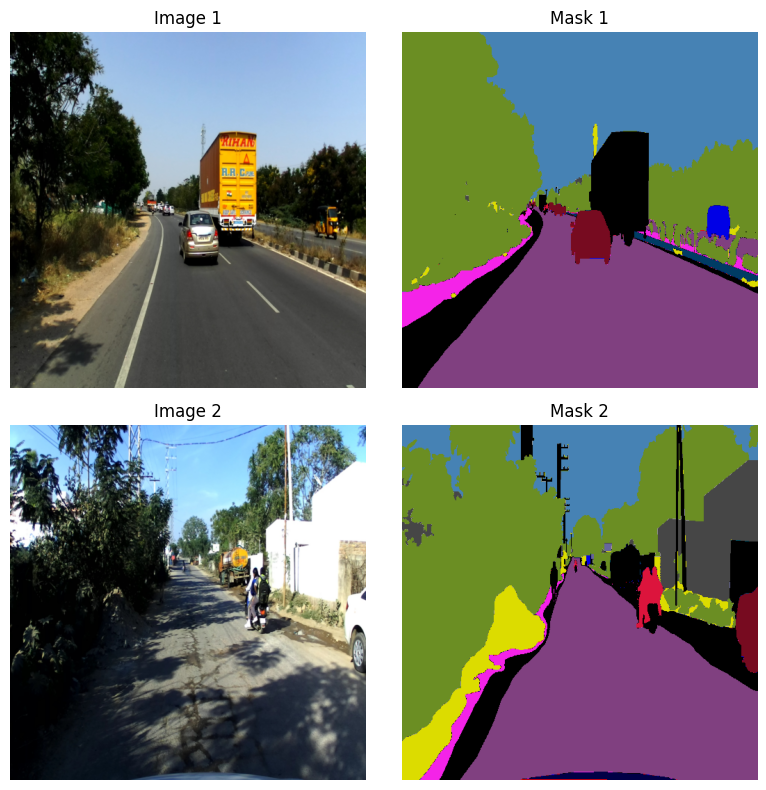

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(img1.permute(1, 2, 0))
axes[0, 0].axis('off')  # Optional, to turn off axis
axes[0, 0].set_title('Image 1')

axes[0, 1].imshow(color_mask(mask1))
axes[0, 1].axis('off')  # Optional, to turn off axis
axes[0, 1].set_title('Mask 1')

axes[1, 0].imshow(img2.permute(1, 2, 0))
axes[1, 0].axis('off')  # Optional, to turn off axis
axes[1, 0].set_title('Image 2')

axes[1, 1].imshow(color_mask(mask2))
axes[1, 1].axis('off')  # Optional, to turn off axis
axes[1, 1].set_title('Mask 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
  # import torch
  # from torchvision import models

  # # Define the path to the model
  # model_path = '/content/drive/MyDrive/CV /Models/deeplabv3plus_cityscapes.pth'

  # # Load the trained weights, explicitly mapping to CPU
  # model = torch.load(model_path, map_location=torch.device('cpu'))

In [12]:
import torch
import sys
sys.path.append('/content/drive/MyDrive/CV /Models/DeepLabV3Plus-Pytorch-master')
import network

# Set your parameters
MODEL_NAME = "deeplabv3plus_resnet101"  # Adjust this if necessary
NUM_CLASSES = 19  # Set the number of classes
OUTPUT_STRIDE = 3  # Set the output stride
PATH_TO_PTH = '/content/drive/MyDrive/CV /Models/deeplabv3plus_resnet101_cityscapes.pth'  # Path to your model.pth

model = network.modeling.__dict__[MODEL_NAME](num_classes=NUM_CLASSES, output_stride=OUTPUT_STRIDE)
model.load_state_dict(torch.load(PATH_TO_PTH, map_location=torch.device('cpu'))['model_state'])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:00<00:00, 241MB/s]


<All keys matched successfully>

In [ ]:
output = 0
for img, mask in dataloader:
  output = model(img)
  break

In [ ]:
preds = output.max(1)[1].detach().cpu().numpy()
preds = torch.tensor(preds).type(torch.uint8)

In [ ]:
print(mask.shape)
print(img.shape)
print(preds.shape)

torch.Size([8, 1, 512, 512])
torch.Size([8, 3, 512, 512])
torch.Size([8, 512, 512])


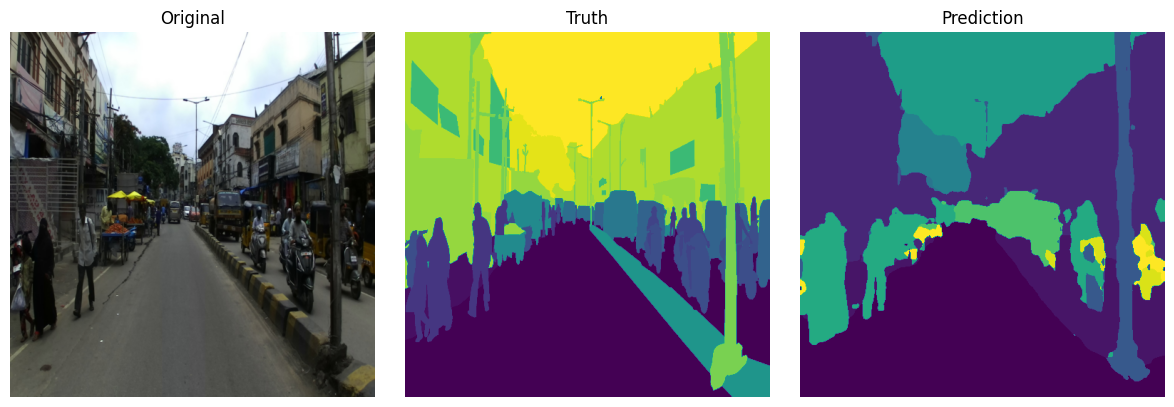

In [ ]:
def show_image(img, mask, preds):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  axes[0].imshow(img.permute(1, 2, 0))
  axes[0].axis('off')  # Optional, to turn off axis
  axes[0].set_title('Original')

  axes[1].imshow(mask.permute(1, 2, 0))
  axes[1].axis('off')  # Optional, to turn off axis
  axes[1].set_title('Truth')

  axes[2].imshow(preds)
  axes[2].axis('off')  # Optional, to turn off axis
  axes[2].set_title('Prediction')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show the plot
  plt.show()

show_image(img[0], mask[0], preds[0])

In [ ]:
Cityscape_to_IDD = {
    0: 0, # road
    1: 2, # sidewalk
    2: 22, # building
    3: 14, # wall
    4: 15, # fence
    5: 20, # pole
    6: 19, # traffic light
    7: 18, # traffic sign
    8: 24, # vegetation
    9: 24, # terrain (DOES NOT EXIST IN IDD)
    10: 25, # sky
    11: 4, # person
    12: 5, # rider
    13: 9, # car
    14: 10, # truck
    15: 11, # bus
    16: 12, # train
    17: 6, # motorcycle
    18: 7,# bicycle
}

In [ ]:
# Iterate over each pixel and replace it
import copy

pred_temp = copy.deepcopy(preds[0])
for y in range(pred_temp.shape[1]):
    for x in range(pred_temp.shape[0]):
        pixel_value = pred_temp[x, y]
        if(pixel_value.item() in Cityscape_to_IDD.keys()):
            pred_temp[x, y] = Cityscape_to_IDD[pixel_value.item()]
        else:
            print("Value Not found : ", pixel_value)

In [ ]:
pred_temp

tensor([[22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]], dtype=torch.uint8)

In [ ]:
sames = {}
for y in range(pred_temp.shape[1]):
    for x in range(pred_temp.shape[0]):
      if(mask[0][0][x, y].item() == pred_temp[x, y].item()):
        if pred_temp[x, y].item() not in sames.keys():
            sames[pred_temp[x, y].item()] = 1
        else:
            sames[pred_temp[x, y].item()] += 1

In [ ]:
sames

{22: 49340,
 7: 15,
 2: 47,
 0: 64784,
 4: 10652,
 20: 8488,
 25: 36452,
 24: 5699,
 9: 893,
 6: 1715}

In [ ]:
tot = sum(list(sames.values()))
print(tot)
print(512*512)

178085
262144


In [ ]:
mask[0][0]

tensor([[22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        ...,
        [ 0,  0,  0,  ..., 13, 13, 13],
        [ 0,  0,  0,  ..., 13, 13, 13],
        [ 0,  0,  0,  ..., 13, 13, 13]], dtype=torch.uint8)

In [ ]:
pred_temp

tensor([[22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        [22, 22, 22,  ..., 22, 22, 22],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]], dtype=torch.uint8)

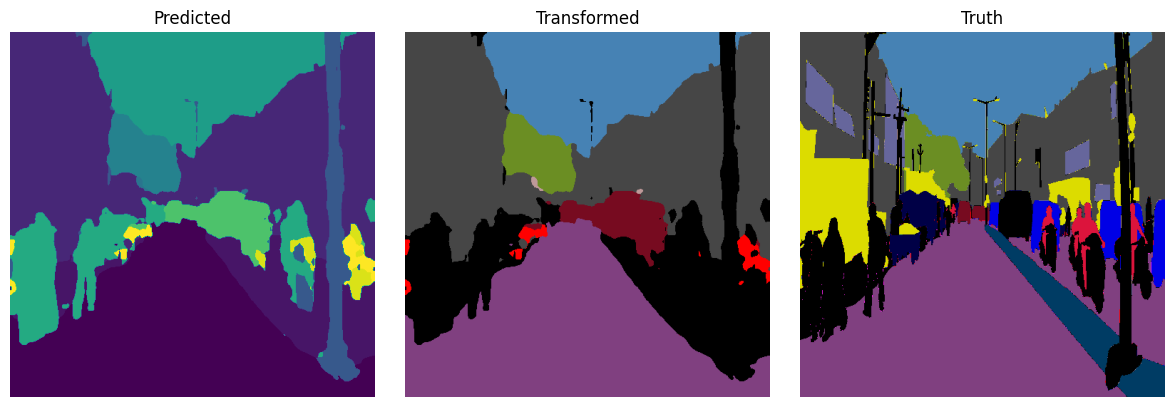

In [ ]:
def show_pics(img1, img2, mask):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))

  axes[0].imshow(img1)
  axes[0].axis('off')  # Optional, to turn off axis
  axes[0].set_title('Predicted')

  axes[1].imshow(color_mask(img2))
  axes[1].axis('off')  # Optional, to turn off axis
  axes[1].set_title('Transformed')

  axes[2].imshow(color_mask(mask))
  axes[2].axis('off')  # Optional, to turn off axis
  axes[2].set_title('Truth')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show the plot
  plt.show()

show_pics(preds[0], pred_temp, mask[0][0])

In [ ]:
classes = {
    0: 'road',
    3: 'sidewalk',
    5: 'person',
    7: 'rider',
    8: 'motorbike',
    9: 'bicycle',
    11: 'car',
    12: 'truck',
    13: 'bus',
    15: 'train',
    17: 'wall',
    18: 'fence',
    21: 'traffic sign',
    22: 'building',
    23: 'pole',
    24: 'vegetation',
    25: 'sky'
}

In [ ]:
def pixelwise_accuracy(pred, mask):
  acc = {}
  totes = {}
  for y in range(preds[0].shape[1]):
    for x in range(preds[0].shape[0]):
      if mask[x, y].item() not in totes.keys():
          totes[mask[x, y].item()] = 1
      else:
          totes[mask[x, y].item()] += 1

      if(mask[x, y].item() == pred_temp[x, y].item()):
          if pred_temp[x, y].item() not in acc.keys():
              acc[pred_temp[x, y].item()] = 1
          else:
              acc[pred_temp[x, y].item()] += 1

  accuracies = {}
  for key in totes.keys():
      if key in acc.keys():
        accuracies[key] = acc[key]/totes[key]

  return accuracies

In [ ]:
def pixelwise_accuracy(pred_masks, true_masks):
    class_ids = np.unique(true_masks)
    dice_scores = {}

    for class_id in class_ids:
        TP = np.logical_and(pred_masks == class_id, true_masks == class_id).sum().item()
        FP = np.logical_and(pred_masks == class_id, true_masks != class_id).sum().item()
        FN = np.logical_and(pred_masks != class_id, true_masks == class_id).sum().item()
        TN = np.logical_and(pred_masks != class_id, true_masks != class_id).sum().item()

        dice = (TP+TN) / (TP + FP + FN + TN)

        dice_scores[class_id] = dice

    return dice_scores


In [ ]:
print(pixelwise_accuracy(preds, mas))

{0: 0.9428787231445312, 1: 0.9293174743652344, 2: 0.6808891296386719, 3: 0.99932861328125, 4: 0.95538330078125, 5: 0.9417076110839844, 6: 0.9677810668945312, 7: 0.9985694885253906, 8: 0.9479789733886719, 9: 0.9962959289550781, 10: 0.8474159240722656, 11: 0.9218254089355469, 12: 0.9832954406738281, 13: 0.9306869506835938, 14: 0.999755859375, 15: 0.999755859375, 16: 0.9998359680175781, 17: 0.9625892639160156, 18: 0.9905891418457031, 19: 0.9994468688964844, 20: 0.9485893249511719, 21: 0.93017578125, 22: 0.8056755065917969, 23: 0.9990158081054688, 24: 0.9771690368652344, 25: 0.8567047119140625}


In [ ]:
def classwise_dice_coefficient(pred_masks, true_masks):
    true_masks = np.squeeze(true_masks, axis=1)
    dice_scores = {}  # Dictionary to store class-wise Dice coefficients

    for class_id in list(classes.keys()):
        # Calculate True Positive (TP), False Positive (FP), and False Negative (FN)
        TP = np.logical_and(pred_masks == class_id, true_masks == class_id).sum().item()
        FP = np.logical_and(pred_masks == class_id, true_masks != class_id).sum().item()
        FN = np.logical_and(pred_masks != class_id, true_masks == class_id).sum().item()

        # print(TP)

        # Calculate Dice coefficient
        dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0.0

        dice_scores[class_id] = dice

    return dice_scores


In [ ]:
 print(classwise_dice_coefficient(preds, mask))

{0: 0.8861072553991544, 3: 0.0019255069498766472, 5: 0.04099862982009716, 7: 0.0, 8: 0.0024320712183873764, 9: 0.0008851976724508259, 11: 0.0025498495588760265, 12: 0.005359988410835868, 13: 0.007171412005248863, 15: 0.0, 17: 0.0002674920707707593, 18: 0.0003722777191785072, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0}


In [ ]:
def classwise_iou(pred_masks, true_masks):
    true_masks = np.squeeze(true_masks, axis=1)
    iou_scores = {}

    for class_id in list(classes.keys()):
        intersection = np.logical_and(pred_masks == class_id, true_masks == class_id).sum().item()
        union = np.logical_or(pred_masks == class_id, true_masks == class_id).sum().item()

        iou = intersection / union if union > 0 else 0.0
        iou_scores[class_id] = iou

    return iou_scores


In [ ]:
 print(classwise_iou(preds, mask))

{0: 0.7955050068278195, 3: 0.0009636812624224538, 5: 0.020928331365246616, 7: 0.0, 8: 0.001217516152189519, 9: 0.00044279481669596925, 11: 0.0012765522875816994, 12: 0.0026871958747911977, 13: 0.0035986095585195167, 15: 0.0, 17: 0.00013376392578013033, 18: 0.00018617351371478217, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0}


In [ ]:
def calculate_iou(pred_mask, true_mask):
    intersection = np.logical_and(pred_mask, true_mask).sum().item()
    union = np.logical_or(pred_mask, true_mask).sum().item()

    iou = intersection / union if union > 0 else 0.0
    return iou

In [ ]:
len(dataset)

6982

In [13]:
classes = {
    0: 'road',
    3: 'sidewalk',
    5: 'person',
    7: 'rider',
    8: 'motorbike',
    9: 'bicycle',
    11: 'car',
    12: 'truck',
    13: 'bus',
    15: 'train',
    17: 'wall',
    18: 'fence',
    21: 'traffic sign',
    22: 'building',
    23: 'pole',
    24: 'vegetation',
    25: 'sky'
}

In [ ]:
def create_confusion_matrix(pred_mask, true_mask):
    num_classes = len(list(classes.keys()))
    confusion_matrix = {}

    for class_id in list(classes.keys()):
        TP = np.logical_and(pred_mask == class_id, true_mask == class_id).sum().item()
        TN = np.logical_and(pred_mask != class_id, true_mask != class_id).sum().item()
        FP = np.logical_and(pred_mask == class_id, true_mask != class_id).sum().item()
        FN = np.logical_and(pred_mask != class_id, true_mask == class_id).sum().item()

        confusion_matrix[class_id] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

    return confusion_matrix

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'

In [ ]:
def classwise_iou(pred_masks, true_masks):
    true_masks = np.squeeze(true_masks, axis=1)
    iou_scores = {}

    for class_id in list(classes.keys()):
        intersection = np.logical_and(pred_masks == class_id, true_masks == class_id).sum().item()
        union = np.logical_or(pred_masks == class_id, true_masks == class_id).sum().item()

        iou = intersection / union if union > 0 else 0.0
        iou_scores[class_id] = iou

    return iou_scores


In [18]:
import torch
import numpy as np

# Move model to GPU
model.to('cuda')

# Initialize dictionaries to accumulate metrics for each class
class_count = len(classes)
iou_sum = {class_id: 0.0 for class_id in classes.keys()}
dice_sum = {class_id: 0.0 for class_id in classes.keys()}
pixelwise_sum = {class_id: 0.0 for class_id in classes.keys()}

counter_bad = 0
bad_iou_store = []

confusion_matrix = {class_id: {'TP': 0, 'FP': 0, 'FN': 0, 'TN': 0} for class_id in classes.keys()}

# Loop through the data loader
for iter, (img, mask) in enumerate(dataloader):

    print(iter)

    if iter > 250:
        break

    # Move data to GPU
    img, mask = img.to('cuda'), mask.to('cuda')

    output = model(img)
    preds = output.max(1)[1].detach().cpu().numpy()
    pred_masks = torch.tensor(preds, device='cuda').type(torch.uint8)

    true_masks = np.squeeze(mask.cpu().numpy(), axis=1)
    for class_id in list(classes.keys()):

        intersection = np.logical_and(pred_masks.cpu().numpy() == class_id, true_masks == class_id).sum().item()
        union = np.logical_or(pred_masks.cpu().numpy() == class_id, true_masks == class_id).sum().item()

        TP = np.logical_and(pred_masks.cpu().numpy() == class_id, true_masks == class_id).sum().item()
        FP = np.logical_and(pred_masks.cpu().numpy() == class_id, true_masks != class_id).sum().item()
        FN = np.logical_and(pred_masks.cpu().numpy() != class_id, true_masks == class_id).sum().item()
        TN = np.logical_and(pred_masks.cpu().numpy() != class_id, true_masks != class_id).sum().item()

        confusion_matrix[class_id]['TP'] += TP
        confusion_matrix[class_id]['FP'] += FP
        confusion_matrix[class_id]['FN'] += FN
        confusion_matrix[class_id]['TN'] += TN

        # Classwise IoU
        iou = intersection / union if union > 0 else 0.0
        iou_sum[class_id] += iou

        # Dice coefficient
        dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0.0
        dice_sum[class_id] += dice

        pixelwise = (TP+TN) / (TP + FP + FN + TN)
        pixelwise_sum[class_id] += pixelwise

    # normal IoU
    intersection = np.logical_and(pred_masks.cpu().numpy(), true_masks).sum().item()
    union = np.logical_or(pred_masks.cpu().numpy(), true_masks).sum().item()

    iou = intersection / union if union > 0 else 0.0
    if iou < 0.5 and counter_bad < 10:
      bad_iou_store.append([img.cpu(), true_masks, pred_masks.cpu()])
      counter_bad += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251


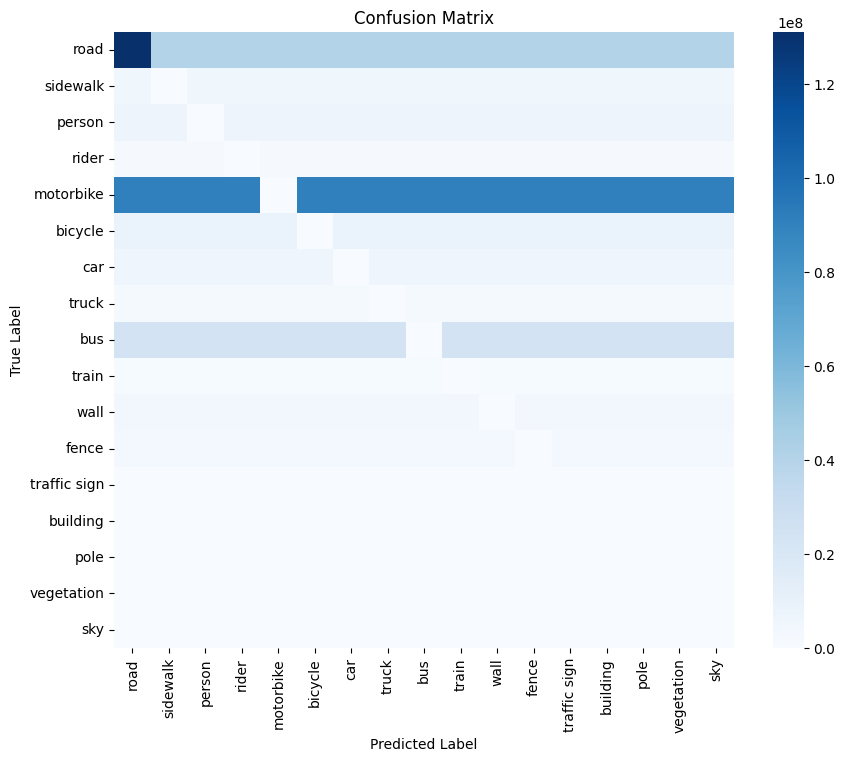

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(confusion_matrix, classes):
    # Convert confusion matrix to DataFrame for easier plotting
    cm_df = pd.DataFrame(confusion_matrix, index=classes.values(), columns=classes.values())

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=False, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Create confusion matrix
confusion_matrix_counts = np.zeros((len(classes), len(classes)), dtype=int)
class_ids = list(classes.keys())
for i, true_class_id in enumerate(class_ids):
    for j, pred_class_id in enumerate(class_ids):
        confusion_matrix_counts[i, j] = confusion_matrix[true_class_id]['TP'] if i == j else confusion_matrix[true_class_id]['FP']

# Plot confusion matrix as heatmap
plot_confusion_matrix(confusion_matrix_counts, classes)

In [20]:
# Function to calculate precision, recall, and F1 score
def calculate_metrics(confusion_matrix):
    precision = {}
    recall = {}
    f1_score = {}

    for class_id, metrics in confusion_matrix.items():
        TP = metrics['TP']
        FP = metrics['FP']
        FN = metrics['FN']

        # Calculate precision
        precision[class_id] = TP / (TP + FP) if (TP + FP) > 0 else 0.0

        # Calculate recall
        recall[class_id] = TP / (TP + FN) if (TP + FN) > 0 else 0.0

        # Calculate F1 score
        f1_score[class_id] = 2 * (precision[class_id] * recall[class_id]) / (precision[class_id] + recall[class_id]) if (precision[class_id] + recall[class_id]) > 0 else 0.0

    return precision, recall, f1_score

# Calculate metrics
precision, recall, f1_score = calculate_metrics(confusion_matrix)

# Print metrics for each class
for class_id, class_name in classes.items():
    print(f"Class: {class_name}")
    print(f"Precision: {precision[class_id]}")
    print(f"Recall: {recall[class_id]}")
    print(f"F1 Score: {f1_score[class_id]}")
    print()

Class: road
Precision: 0.7633339005332122
Recall: 0.9647499470629124
F1 Score: 0.8523039448058716

Class: sidewalk
Precision: 0.014404033003034217
Recall: 0.010735131971552044
F1 Score: 0.012301856117057308

Class: person
Precision: 0.00730958494929837
Recall: 0.012799660682431935
F1 Score: 0.009305193122988388

Class: rider
Precision: 0.0008896419757605974
Recall: 0.004746374340436877
F1 Score: 0.0014984249899313866

Class: motorbike
Precision: 0.00238604227189129
Recall: 0.026264569084572476
F1 Score: 0.004374662118660911

Class: bicycle
Precision: 0.002005712501220315
Recall: 0.0016091100950635423
F1 Score: 0.0017856545639759083

Class: car
Precision: 0.0025584317743947635
Recall: 0.007881052973675659
F1 Score: 0.00386286044381012

Class: truck
Precision: 0.006244216258542141
Recall: 0.0054339156870002615
F1 Score: 0.005810954155774146

Class: bus
Precision: 0.01865188251648054
Recall: 0.05418785156565046
F1 Score: 0.027751486299589446

Class: train
Precision: 0.00045378571829828896

In [23]:
import pickle

with open('confusion_matrix.pkl', 'wb') as f:
    pickle.dump(confusion_matrix, f)

with open('iou_sum.pkl', 'wb') as f:
    pickle.dump(iou_sum, f)

with open('dice_sum.pkl', 'wb') as f:
    pickle.dump(dice_sum, f)

with open('pixelwise_sum.pkl', 'wb') as f:
    pickle.dump(pixelwise_sum, f)
